<a href="https://colab.research.google.com/github/ABINAYA252004/ABINAYASHRI_0DB938972B2ABC4B4194A7EF5BEDCB70/blob/main/Smote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
dataset=pd.read_csv('/content/kidney_disease (1) (1).csv')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
dataset['pcv'] = pd.to_numeric(dataset['pcv'], errors='coerce')
dataset['wc'] = pd.to_numeric(dataset['wc'], errors='coerce')
dataset['rc'] = pd.to_numeric(dataset['rc'], errors='coerce')

In [ ]:
dataset.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

In [ ]:
# Select integer columns
int_cols = dataset.select_dtypes(include=['int64'])
# Select float columns
float_cols = dataset.select_dtypes(include=['float64'])
# Select object (string) columns
object_cols = dataset.select_dtypes(include=['object'])

In [ ]:
int_cols

,id
0,0
1,1
2,2
3,3
4,4
...,...
395,395
396,396
397,397
398,398


In [ ]:
float_cols

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


In [ ]:
object_cols

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [ ]:
float_cols.isnull().sum()

,0
age,9
bp,12
sg,47
al,46
su,49
bgr,44
bu,19
sc,17
sod,87
pot,88


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
float_cols_sc=scaler.fit_transform(float_cols)

In [ ]:
float_cols_sc

array([[-0.20313902,  0.25837332,  0.45407053, ...,  0.56988141,
        -0.20620181,  0.4812952 ],
       [-2.59412412, -1.93685691,  0.45407053, ..., -0.09853564,
        -0.8185587 ,         nan],
       [ 0.61329491,  0.25837332, -1.29769883, ..., -0.87835554,
        -0.30826129,         nan],
       ...,
       [-2.30254057,  0.25837332,  0.45407053, ...,  1.12689562,
        -0.61443974,  0.67671921],
       [-2.01095702, -1.2051135 ,  1.32995521, ...,  1.34970131,
        -0.41032077,  1.16527924],
       [ 0.38002807,  0.25837332,  1.32995521, ...,  1.57250699,
        -0.54640008,  1.36070326]])

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imputer = KNNImputer(n_neighbors=5)
float_cols_imput=imputer.fit_transform(float_cols_sc)

In [ ]:
float_cols_imput

array([[-0.20313902,  0.25837332,  0.45407053, ...,  0.56988141,
        -0.20620181,  0.4812952 ],
       [-2.59412412, -1.93685691,  0.45407053, ..., -0.09853564,
        -0.8185587 ,  0.4812952 ],
       [ 0.61329491,  0.25837332, -1.29769883, ..., -0.87835554,
        -0.30826129, -0.53490967],
       ...,
       [-2.30254057,  0.25837332,  0.45407053, ...,  1.12689562,
        -0.61443974,  0.67671921],
       [-2.01095702, -1.2051135 ,  1.32995521, ...,  1.34970131,
        -0.41032077,  1.16527924],
       [ 0.38002807,  0.25837332,  1.32995521, ...,  1.57250699,
        -0.54640008,  1.36070326]])

In [ ]:
# Step 3: Inverse scaling back to original scale
data_imputed = scaler.inverse_transform(float_cols_imput)

In [ ]:
data_imputed

array([[4.800e+01, 8.000e+01, 1.020e+00, ..., 4.400e+01, 7.800e+03,
        5.200e+00],
       [7.000e+00, 5.000e+01, 1.020e+00, ..., 3.800e+01, 6.000e+03,
        5.200e+00],
       [6.200e+01, 8.000e+01, 1.010e+00, ..., 3.100e+01, 7.500e+03,
        4.160e+00],
       ...,
       [1.200e+01, 8.000e+01, 1.020e+00, ..., 4.900e+01, 6.600e+03,
        5.400e+00],
       [1.700e+01, 6.000e+01, 1.025e+00, ..., 5.100e+01, 7.200e+03,
        5.900e+00],
       [5.800e+01, 8.000e+01, 1.025e+00, ..., 5.300e+01, 6.800e+03,
        6.100e+00]])

In [ ]:
float_cols.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc'],
      dtype='object')

In [ ]:
# Step 4: Convert back to DataFrame
imputed_df = pd.DataFrame(data_imputed,columns=float_cols.columns)
imputed_df.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,139.4,4.30,15.4,44.0,7800.0,5.20
1,7.0,50.0,1.020,4.0,0.0,84.8,18.0,0.8,136.0,4.02,11.3,38.0,6000.0,5.20
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,133.0,4.52,9.6,31.0,7500.0,4.16
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.50,11.2,32.0,6700.0,3.90
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,137.4,4.22,11.6,35.0,7300.0,4.60


In [ ]:
imputed_df.isnull().sum()

,0
age,0
bp,0
sg,0
al,0
su,0
bgr,0
bu,0
sc,0
sod,0
pot,0


In [ ]:
object_cols.columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')

In [ ]:
object_cols[["rbc"]].value_counts()

,count
rbc,
normal,201
abnormal,47


In [ ]:
object_cols[["pc"]].value_counts()

,count
pc,
normal,259
abnormal,76


In [ ]:
object_cols[["pcc"]].value_counts()

,count
pcc,
notpresent,354
present,42


In [ ]:
object_cols[["ba"]].value_counts()

,count
ba,
notpresent,374
present,22


In [ ]:
object_cols[["htn"]].value_counts()

,count
htn,
no,251
yes,147


In [ ]:
object_cols[["dm"]].value_counts()

,count
dm,
no,258
yes,134
\tno,3
\tyes,2
yes,1


In [ ]:
object_cols[["cad"]].value_counts()

,count
cad,
no,362
yes,34
\tno,2


In [ ]:
object_cols[["appet"]].value_counts()

,count
appet,
good,317
poor,82


In [ ]:
object_cols[["pe"]].value_counts()

,count
pe,
no,323
yes,76


In [ ]:
object_cols[["ane"]].value_counts()

,count
ane,
no,339
yes,60


In [ ]:
object_cols[["classification"]].value_counts()

,count
classification,
ckd,248
notckd,150
ckd\t,2


In [ ]:
object_cols['dm'] = object_cols['dm'].str.strip()
object_cols['cad'] = object_cols['cad'].str.strip()

In [ ]:
object_cols['classification'] = object_cols['classification'].str.strip()

In [ ]:
object_cols[["classification"]].value_counts()

,count
classification,
ckd,250
notckd,150


In [ ]:
object_cols[["cad"]].value_counts()

,count
cad,
no,364
yes,34


In [ ]:
object_cols[["dm"]].value_counts()

,count
dm,
no,261
yes,137


In [ ]:
object_cols.isnull().sum()

,0
rbc,152
pc,65
pcc,4
ba,4
htn,2
dm,2
cad,2
appet,1
pe,1
ane,1


In [ ]:
dummy= pd.get_dummies(object_cols["rbc"],drop_first=True,dtype=int,dummy_na=True)

In [ ]:
dummy

,normal,NaN
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
395,1,0
396,1,0
397,1,0
398,1,0


In [ ]:
import numpy as np

In [ ]:
dummy = dummy.rename(columns={np.nan: 'nan_col'})
# Apply the condition
dummy.loc[dummy['nan_col'] == 1, 'normal'] = np.nan
object_cols[["rbc"]]=dummy[["normal"]]

In [ ]:
object_cols[["rbc"]].isnull().sum()

,0
rbc,152


In [ ]:
object_cols[["rbc"]].value_counts()

,count
rbc,
1.0,201
0.0,47


In [ ]:
dummy= pd.get_dummies(object_cols["pc"],drop_first=True,dtype=int,dummy_na=True)

In [ ]:
dummy

,normal,NaN
0,1,0
1,1,0
2,1,0
3,0,0
4,1,0
...,...,...
395,1,0
396,1,0
397,1,0
398,1,0


In [ ]:
dummy = dummy.rename(columns={np.nan: 'nan_col'})
# Apply the condition
dummy.loc[dummy['nan_col'] == 1, 'normal'] = np.nan
object_cols[["pc"]]=dummy[["normal"]]

In [ ]:
object_cols[["pc"]].isnull().sum()

,0
pc,65


In [ ]:
object_cols[["pc"]].value_counts()

,count
pc,
1.0,259
0.0,76


In [ ]:
dummy= pd.get_dummies(object_cols["pcc"],drop_first=True,dtype=int,dummy_na=True)

In [ ]:
dummy

,present,NaN
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
395,0,0
396,0,0
397,0,0
398,0,0


In [ ]:
dummy = dummy.rename(columns={np.nan: 'nan_col'})
# Apply the condition
dummy.loc[dummy['nan_col'] == 1, 'present'] = np.nan
object_cols[["pcc"]]=dummy[["present"]]

In [ ]:
object_cols[["pcc"]].isnull().sum()

,0
pcc,4


In [ ]:
object_cols[["pcc"]].value_counts()

,count
pcc,
0.0,354
1.0,42


In [ ]:
dummy= pd.get_dummies(object_cols["ba"],drop_first=True,dtype=int,dummy_na=True)

In [ ]:
dummy

,present,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
395,0,0
396,0,0
397,0,0
398,0,0


In [ ]:
dummy = dummy.rename(columns={np.nan: 'nan_col'})
# Apply the condition
dummy.loc[dummy['nan_col'] == 1, 'present'] = np.nan
object_cols[["ba"]]=dummy[["present"]]

In [ ]:
dummy[["present"]]

,present
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
395,0.0
396,0.0
397,0.0
398,0.0


In [ ]:
dummy= pd.get_dummies(object_cols["htn"],drop_first=True,dtype=int,dummy_na=True)

In [ ]:
dummy

,yes,NaN
0,1,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
395,0,0
396,0,0
397,0,0
398,0,0


In [ ]:
dummy = dummy.rename(columns={np.nan: 'nan_col'})
# Apply the condition
dummy.loc[dummy['nan_col'] == 1, 'yes'] = np.nan
object_cols[["htn"]]=dummy[["yes"]]

In [ ]:
object_cols[["htn"]].isnull().sum()

,0
htn,2


In [ ]:
dummy= pd.get_dummies(object_cols["dm"],drop_first=True,dtype=int,dummy_na=True)

In [ ]:
dummy

,yes,NaN
0,1,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
395,0,0
396,0,0
397,0,0
398,0,0


In [ ]:
dummy = dummy.rename(columns={np.nan: 'nan_col'})
# Apply the condition
dummy.loc[dummy['nan_col'] == 1, 'yes'] = np.nan
object_cols[["dm"]]=dummy[["yes"]]

In [ ]:
object_cols[["dm"]].isnull().sum()

,0
dm,2


In [ ]:
object_cols[["dm"]].value_counts()

,count
dm,
0.0,261
1.0,137


In [ ]:
dummy= pd.get_dummies(object_cols["cad"],drop_first=True,dtype=int,dummy_na=True)

In [ ]:
dummy

,yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
395,0,0
396,0,0
397,0,0
398,0,0


In [ ]:
dummy = dummy.rename(columns={np.nan: 'nan_col'})
# Apply the condition
dummy.loc[dummy['nan_col'] == 1, 'yes'] = np.nan
object_cols[["cad"]]=dummy[["yes"]]

In [ ]:
dummy= pd.get_dummies(object_cols["appet"],drop_first=True,dtype=int,dummy_na=True)

In [ ]:
dummy

,poor,NaN
0,0,0
1,0,0
2,1,0
3,1,0
4,0,0
...,...,...
395,0,0
396,0,0
397,0,0
398,0,0


In [ ]:
dummy = dummy.rename(columns={np.nan: 'nan_col'})
# Apply the condition
dummy.loc[dummy['nan_col'] == 1, 'poor'] = np.nan
object_cols[["appet"]]=dummy[["poor"]]

In [ ]:
dummy= pd.get_dummies(object_cols["pe"],drop_first=True,dtype=int,dummy_na=True)

In [ ]:
dummy

,yes,NaN
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
395,0,0
396,0,0
397,0,0
398,0,0


In [ ]:
dummy = dummy.rename(columns={np.nan: 'nan_col'})
# Apply the condition
dummy.loc[dummy['nan_col'] == 1, 'yes'] = np.nan
object_cols[["pe"]]=dummy[["yes"]]

In [ ]:
dummy= pd.get_dummies(object_cols["ane"],drop_first=True,dtype=int,dummy_na=True)

In [ ]:
dummy

,yes,NaN
0,0,0
1,0,0
2,1,0
3,1,0
4,0,0
...,...,...
395,0,0
396,0,0
397,0,0
398,0,0


In [ ]:
dummy = dummy.rename(columns={np.nan: 'nan_col'})
# Apply the condition
dummy.loc[dummy['nan_col'] == 1, 'yes'] = np.nan
object_cols[["ane"]]=dummy[["yes"]]

In [ ]:
dummy= pd.get_dummies(object_cols["classification"],drop_first=True,dtype=int,dummy_na=True)

In [ ]:
dummy

,notckd,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
395,1,0
396,1,0
397,1,0
398,1,0


In [ ]:
dummy = dummy.rename(columns={np.nan: 'nan_col'})
# Apply the condition
dummy.loc[dummy['nan_col'] == 1, 'notckd'] = np.nan
object_cols[["classification"]]=dummy[["notckd"]]

In [ ]:
object_cols

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,NaN,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
396,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
397,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
398,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
object_cols = object_cols.astype("Int64")

In [ ]:
object_cols

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,<NA>,1,0,0,1,1,0,0,0,0,0
1,<NA>,1,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,1,0,1,0
3,1,0,1,0,1,0,0,1,1,1,0
4,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,1,0,0,0,0,0,0,0,0,1
396,1,1,0,0,0,0,0,0,0,0,1
397,1,1,0,0,0,0,0,0,0,0,1
398,1,1,0,0,0,0,0,0,0,0,1


In [ ]:
scaler = StandardScaler()
object_cols_sc=scaler.fit_transform(object_cols)

In [ ]:
object_cols

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,<NA>,1,0,0,1,1,0,0,0,0,0
1,<NA>,1,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,1,0,1,0
3,1,0,1,0,1,0,0,1,1,1,0
4,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,1,0,0,0,0,0,0,0,0,1
396,1,1,0,0,0,0,0,0,0,0,1
397,1,1,0,0,0,0,0,0,0,0,1
398,1,1,0,0,0,0,0,0,0,0,1


In [ ]:
imputer = KNNImputer(n_neighbors=5)
object_cols_imput=imputer.fit_transform(object_cols_sc)

In [ ]:
object_cols_imput

array([[ 0.48356059,  0.5416976 , -0.34444748, ..., -0.48507125,
        -0.42070316, -0.77459667],
       [-0.53706091,  0.5416976 , -0.34444748, ..., -0.48507125,
        -0.42070316, -0.77459667],
       [ 0.48356059,  0.5416976 , -0.34444748, ..., -0.48507125,
         2.37697286, -0.77459667],
       ...,
       [ 0.48356059,  0.5416976 , -0.34444748, ..., -0.48507125,
        -0.42070316,  1.29099445],
       [ 0.48356059,  0.5416976 , -0.34444748, ..., -0.48507125,
        -0.42070316,  1.29099445],
       [ 0.48356059,  0.5416976 , -0.34444748, ..., -0.48507125,
        -0.42070316,  1.29099445]])

In [ ]:
data_imputed = scaler.inverse_transform(object_cols_imput)

In [ ]:
data_imputed

array([[1. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0.6, 1. , 0. , ..., 0. , 0. , 0. ],
       [1. , 1. , 0. , ..., 0. , 1. , 0. ],
       ...,
       [1. , 1. , 0. , ..., 0. , 0. , 1. ],
       [1. , 1. , 0. , ..., 0. , 0. , 1. ],
       [1. , 1. , 0. , ..., 0. , 0. , 1. ]])

In [ ]:
# Step 4: Convert back to DataFrame
imputed_df = pd.DataFrame(data_imputed,columns=object_cols.columns)

In [ ]:
imputed_df

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
396,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
397,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
398,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Round to 0 or 1
object_cols = imputed_df.round().astype("Int64")

In [ ]:
object_cols

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,1,1,0,0,1,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,1,0,1,0
3,1,0,1,0,1,0,0,1,1,1,0
4,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,1,0,0,0,0,0,0,0,0,1
396,1,1,0,0,0,0,0,0,0,0,1
397,1,1,0,0,0,0,0,0,0,0,1
398,1,1,0,0,0,0,0,0,0,0,1


In [ ]:
df = pd.concat([int_cols, object_cols], axis=1)
display(df.head())

,id,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,0,1,1,0,0,1,1,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0
2,2,1,1,0,0,0,1,0,1,0,1,0
3,3,1,0,1,0,1,0,0,1,1,1,0
4,4,1,1,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              400 non-null    int64
 1   rbc             400 non-null    Int64
 2   pc              400 non-null    Int64
 3   pcc             400 non-null    Int64
 4   ba              400 non-null    Int64
 5   htn             400 non-null    Int64
 6   dm              400 non-null    Int64
 7   cad             400 non-null    Int64
 8   appet           400 non-null    Int64
 9   pe              400 non-null    Int64
 10  ane             400 non-null    Int64
 11  classification  400 non-null    Int64
dtypes: Int64(11), int64(1)
memory usage: 41.9 KB


In [ ]:
X = df.drop('classification', axis=1)
y = df['classification']

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [ ]:
import pickle

# Save the trained model to a file
filename = 'knn_model.pkl'
pickle.dump(model, open(filename, 'wb'))

print(f"Model saved to {filename}")

Model saved to knn_model.pkl


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
x_train_final = x_train[:50000]
y_train_final = y_train[:50000]
x_val = x_train[50000:]
y_val = y_train[50000:]

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train_final, y_train_final,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.8056 - loss: 0.6776 - val_accuracy: 0.9548 - val_loss: 0.1652
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9519 - loss: 0.1659 - val_accuracy: 0.9651 - val_loss: 0.1207
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9680 - loss: 0.1100 - val_accuracy: 0.9685 - val_loss: 0.1035
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9769 - loss: 0.0798 - val_accuracy: 0.9719 - val_loss: 0.0936
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9808 - loss: 0.0627 - val_accuracy: 0.9695 - val_loss: 0.1068
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9864 - loss: 0.0469 - val_accuracy: 0.9735 - val_loss: 0.0936
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9880 - loss: 0.0400 - val_accuracy: 0.9751 - val_loss: 0.0821
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9911 - loss: 0.0306 - val_accuracy: 

In [ ]:
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

In [ ]:

    plt.tight_layout()
    plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:

plot_training_history(history)

<Figure size 1200x500 with 0 Axes>

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X, y = load_digits(return_X_y=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42)

In [ ]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation accuracy:", cv_scores.mean())

Cross-validation accuracy: 0.9721665698799846


In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print("Validation accuracy:", accuracy_score(y_val, y_pred))

Validation accuracy: 0.9722222222222222


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
cm = confusion_matrix(y_val, y_pred)

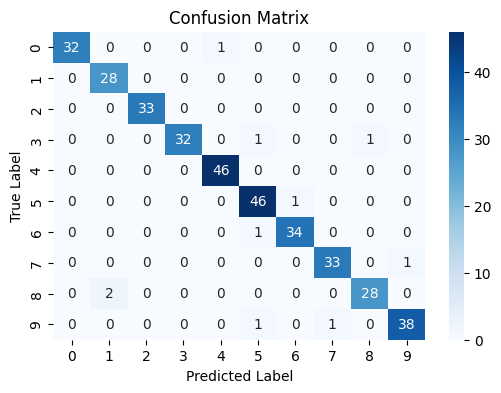

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
2000//32

62

In [ ]:
!pip list

Package                               Version
------------------------------------- ------------------
absl-py                               1.4.0
absolufy-imports                      0.3.1
accelerate                            1.10.1
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.12.15
aiosignal                             1.4.0
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.2
alembic                               1.16.5
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.10.0
anywidget                             0.9.18
argon2-cffi                           25.1.0
argon2-cffi-bindings                  25.1.0
array_record                          0.8.1
arrow 